## Full Pipeline

This is an improved pipeline from the initial version created in assignment 2. It relies on Python modules containing functions for various phases in the pipeline:
1. Explore: Generate some basic descriptive statistics on the data. Graph histograms, box plots, and correlation matrix.
2. Clean: Convert data types of columns that are incorrectly typed.
3. Features: After training and test data have been split, apply feature engineering functions to each data set. This incdes: filling in missing values, capping extreme values (outliers), discretizing continuous variables into buckets, normalizing the dataframe, and making dummy variables from categorical features.
4. Model: Run the magic loops code to try multiple models under multiple parameters.

The config file contains all constants that the user may define when running the script, including the parameter grids.


In [ ]:
import sys
import pandas as pd
import numpy as np
from config import *
from pipeline import *
from explore import *
from cleaning import *
from features import *
from model import *
from sklearn.cross_validation import train_test_split
%matplotlib inline

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Data Exploration

As shown in the charts below, our data is skewed with long right tails. As many of the histograms are uninformative in their initial plots, they have been replotted with a limited x range.

'Shape:'

(150000, 12)

'Data types:'

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

'Summary statistics:'

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,60648.810013,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,56.748197,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,60625.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,60629.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,60644.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,60804.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


'Percent null per column:'

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
zipcode                                 0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.026160
dtype: float64

'Proportion of'

'SeriousDlqin2yrs'

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

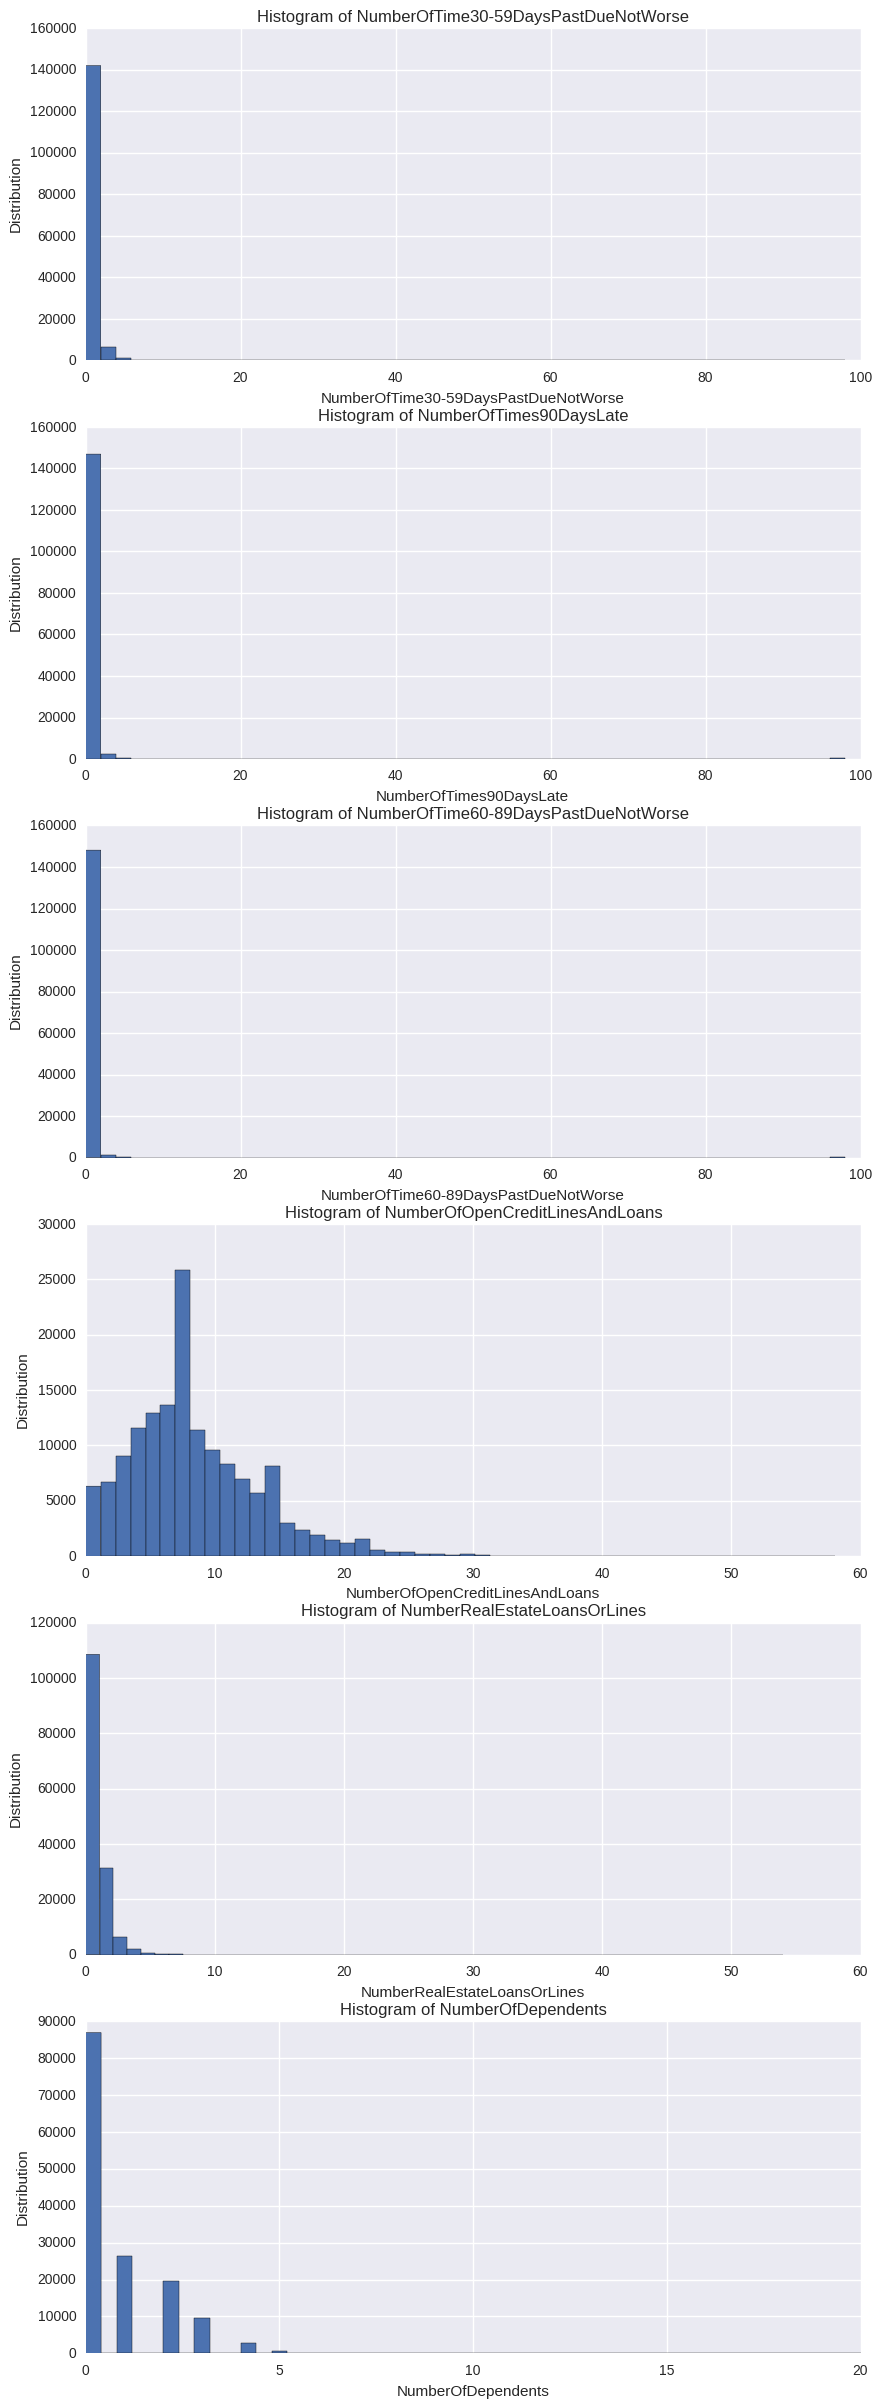

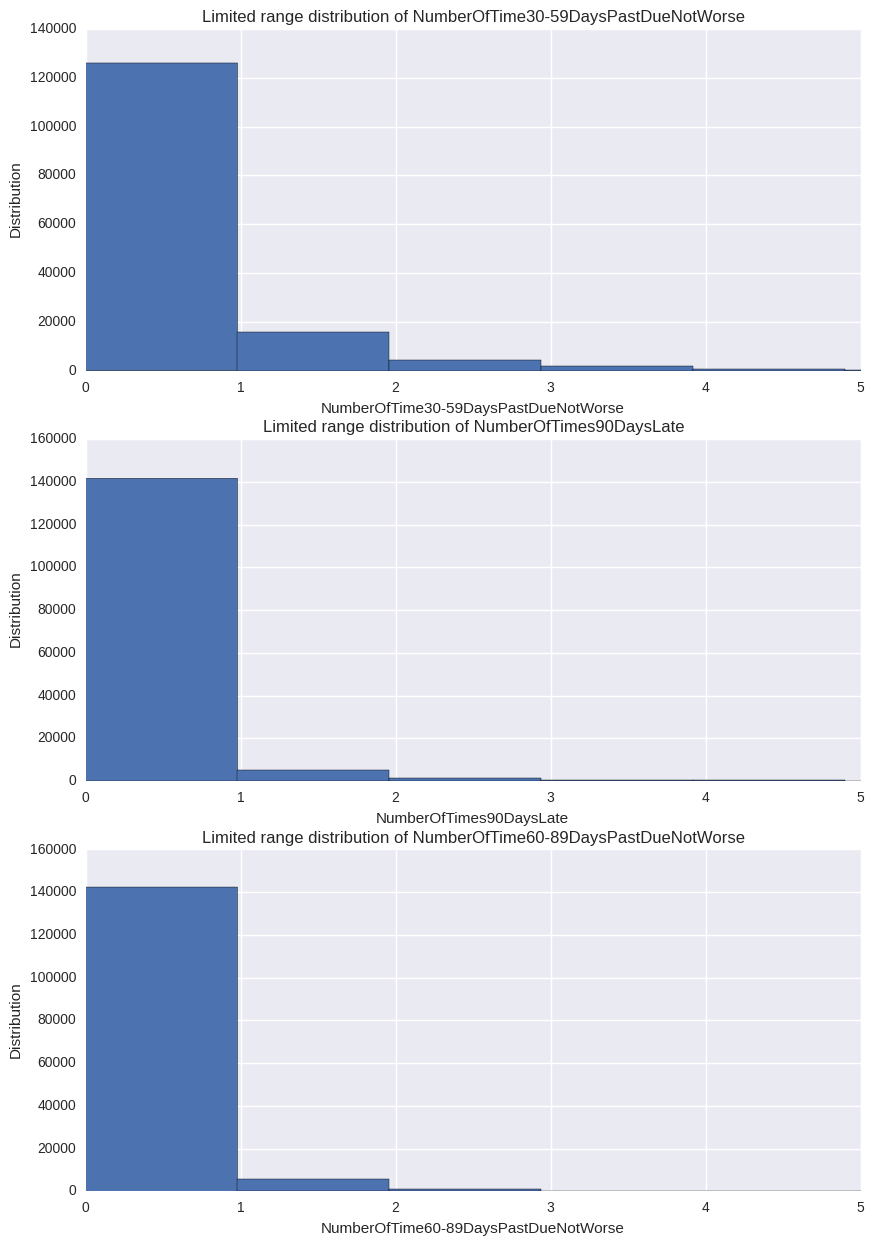

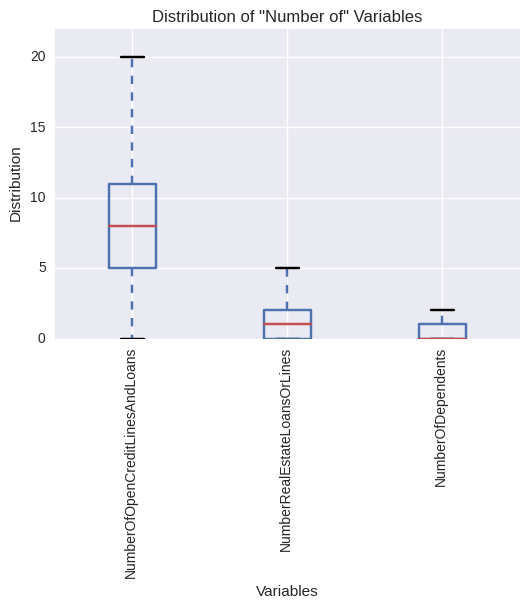

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


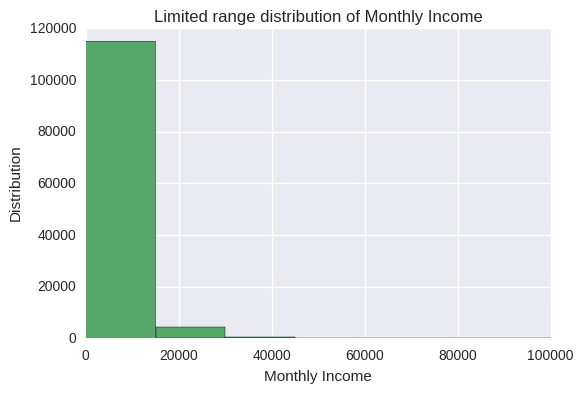

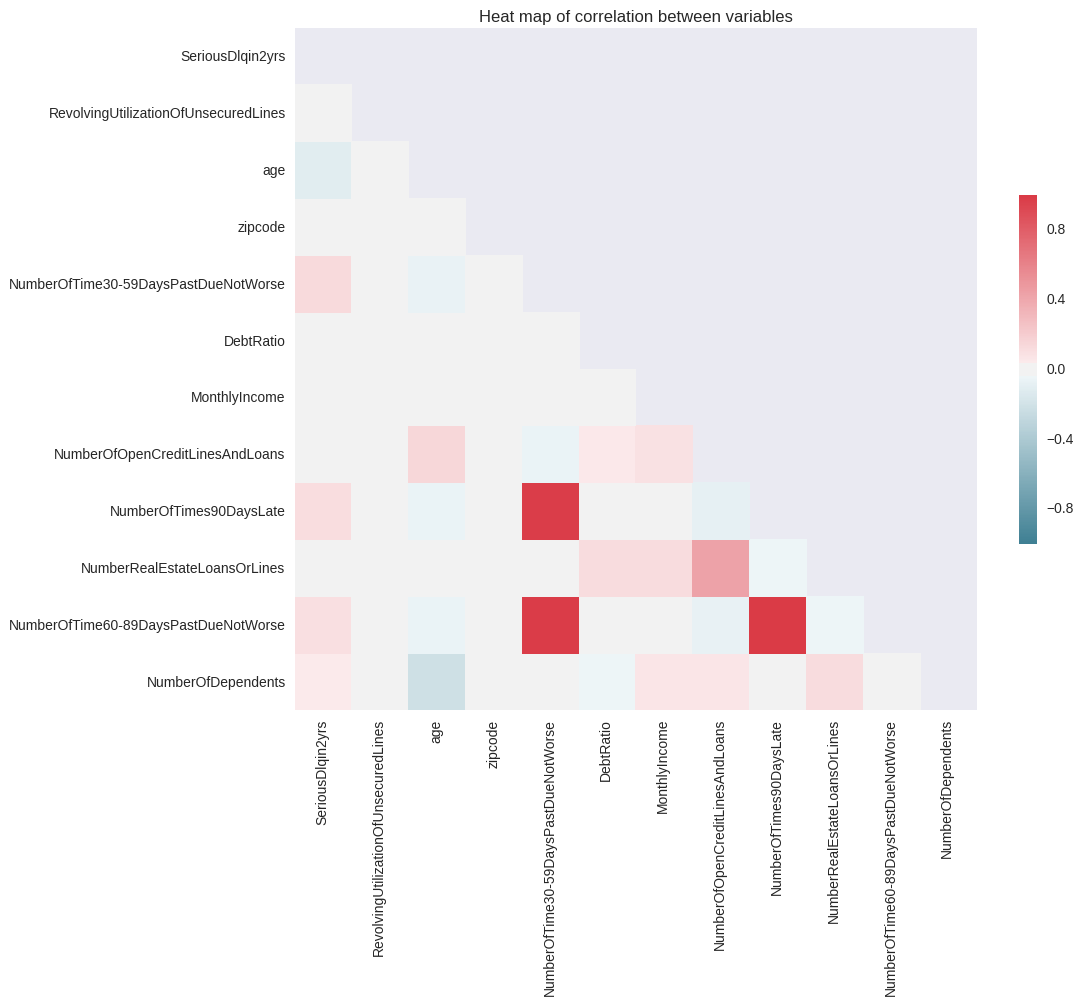

GB
{'max_depth': 5, 'subsample': 0.1, 'n_estimators': 10, 'learning_rate': 0.001}
{'max_depth': 5, 'subsample': 0.5, 'n_estimators': 10, 'learning_rate': 0.001}
{'max_depth': 5, 'subsample': 1.0, 'n_estimators': 10, 'learning_rate': 0.001}
{'max_depth': 5, 'subsample': 0.1, 'n_estimators': 100, 'learning_rate': 0.001}
{'max_depth': 5, 'subsample': 0.5, 'n_estimators': 100, 'learning_rate': 0.001}
{'max_depth': 5, 'subsample': 1.0, 'n_estimators': 100, 'learning_rate': 0.001}
{'max_depth': 50, 'subsample': 0.1, 'n_estimators': 10, 'learning_rate': 0.001}
{'max_depth': 50, 'subsample': 0.5, 'n_estimators': 10, 'learning_rate': 0.001}
{'max_depth': 50, 'subsample': 1.0, 'n_estimators': 10, 'learning_rate': 0.001}
{'max_depth': 50, 'subsample': 0.1, 'n_estimators': 100, 'learning_rate': 0.001}


In [ ]:
df = pd.read_csv('credit-data.csv', index_col=INDEX_COL, sep=SEPERATOR)
results, y_test = pipeline(df)

## Comparison Table

The results dataframe below compares the performance of the different classifiers, across all parameter combinations and all evaluation metrics. It is also saved in a csv titled 'results.csv'.

The evaluation methods used include:
* Runtime
* AUC
* Precision (cutoff=5,10,20)
* Accuracy (cutoff=5,10,20)
* Recall (cutoff=5,10,20)

The results:

* AUC: The classifier that obtains the best AUC metric is Random Forrest, specifically those with a higher number of estimators (100) and a lower depth (5). If we cared about the entire population of individuals rather than a specific segment, such as those with highest credit risk, this AUC metric would be a good indicator of model performance.
* Runtime:The fasest classifier is Decision Tree. Regardless of parameter settings, decision trees are faster than any other classifier, aside from Naive Bayes.
* At 5% cutoff: Random Forest classifiers do the best in precision, accuracy, and recall scores.
* At 10% cutoff: The decision tree classifier at a depth of 50, min_samples_split of 2, criterion as entropy, and max_features as sqrt does the best in precision, accuracy, and recall scores. K-nearest neighbors with n_neighbors = 1 also do very well. 
* At 20% cutoff: Decision trees at a depth of 50 do the best.



In [ ]:
results.head()

## Precision Recall Curves:
Loop through results dataframe and plot the precision-recall curve for each set of parameters


In [ ]:
for index, row in results.iterrows():
    plot_precision_recall_n(y_test,row['y_pred_probs'],row['clf'])

## Recommendation
I would recommend that someone working on the credit model should focus on tweaking the random forest model to improve performance. The random forest classifer did the best in precision, accuracy, and recall at the 5% cutoff level. It also has a decent runtime of approximately half a second per model.

As a whole the models currently do not perform much better than the baseline of random guessing. Predicting an outcome of 0 for every record would be correct 97.3% of the time, since 6.7% of records in the data have outcome = 1. We could use the feature importance capabilities of random forests to trim down the features list to only those that are most impactful. 

I would also recommend determining the best method of deailing with outliers in this dataset. This may involve investigating whether the  outliers are correct, and deciding the best method of treating them.